In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline

We start our program with these initial commands and imports and we read the data. We will need them to respond the questions

We download the files needed

In [0]:
import gdown

url = 'https://drive.google.com/uc?id=1UOccw0VNCiRTwaQSEJMhiYWXhizvKptX'
output = 'train-val.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1UOccw0VNCiRTwaQSEJMhiYWXhizvKptX
To: /content/train-val.zip
2.25GB [00:23, 94.9MB/s]


'train-val.zip'

In [0]:
url = 'https://drive.google.com/uc?id=1diO2apPPFJeTH8CGcd3S55OUNTXtJVu2'
output = 'test.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1diO2apPPFJeTH8CGcd3S55OUNTXtJVu2
To: /content/test.zip
708MB [00:17, 39.6MB/s]


'test.zip'

We unzip the files.

In [0]:
import zipfile
with zipfile.ZipFile('test.zip', 'r') as zip_ref:
    zip_ref.extractall('test-set')

with zipfile.ZipFile('train-val.zip', 'r') as zip_ref:
    zip_ref.extractall('train-val')

with zipfile.ZipFile('train-val/training-set.zip', 'r') as zip_ref:
    zip_ref.extractall('training-set')

with zipfile.ZipFile('train-val/validation-set.zip', 'r') as zip_ref:
    zip_ref.extractall('validation-set')

After unzipping we set thw address of all the files to be the same as the notebook' s.

# Data Exploration

We see what is the content of concept files

In [2]:
data_filename = 'train_concepts.csv'
train_c = pd.read_csv(data_filename)
train_c = pd.DataFrame(train_c)
train_c['tags']=train_c['tags'].str.split(pat = ";")
print(train_c)
data_filename = 'val_concepts.csv'
val_c = pd.read_csv(data_filename)
val_c = pd.DataFrame(val_c)
val_c['tags']=val_c['tags'].str.split(pat = ";")
print(val_c)
data_filename = 'string_concepts.csv'
str_c = pd.read_csv(data_filename, sep='\t', header=None)
str_c = pd.DataFrame(str_c)
str_c=np.array(str_c)
print(str_c)

                 image                                               tags
0      ROCO_CLEF_07350                               [C0203126, C0203051]
1      ROCO_CLEF_19073  [C0772294, C0023884, C0221198, C0412555, C0041...
2      ROCO_CLEF_60501           [C0233492, C2985494, C0262950, C1306232]
3      ROCO_CLEF_05564                               [C0521530, C0817096]
4      ROCO_CLEF_55020                               [C0935598, C1184743]
...                ...                                                ...
56624  ROCO_CLEF_40405           [C0040395, C0034579, C0015450, C0040405]
56625  ROCO_CLEF_17150                               [C0286840, C3244287]
56626  ROCO_CLEF_04341  [C0699900, C1553386, C0728863, C0182400, C0042...
56627  ROCO_CLEF_36569                     [C0023890, C0441633, C3263723]
56628  ROCO_CLEF_51081  [C3263723, C1962945, C1548003, C0015252, C0043...

[56629 rows x 2 columns]
                 image                                               tags
0      ROCO_

We see 10 image files 

In [10]:
imagesList = os.listdir('training-set')
loadedImages = []
for image in imagesList[0:10]:
    img = Image.open('training-set/' + image)
    loadedImages.append(img)

# your images in an array
loadedImages

[<PIL.JpegImagePlugin.JpegImageFile image mode=L size=588x512 at 0x7F5B63EEBE80>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x603 at 0x7F5B63EEBEF0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=735x475 at 0x7F5B63EEBF60>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=600x423 at 0x7F5B63EEBFD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=532x748 at 0x7F5B5F26C080>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=597x427 at 0x7F5B5F26C0F0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=L size=523x539 at 0x7F5B5F26C160>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=657x534 at 0x7F5B5F26C1D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=753x670 at 0x7F5B5F26C240>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x451 at 0x7F5B5F26C2B0>]

We plot these images

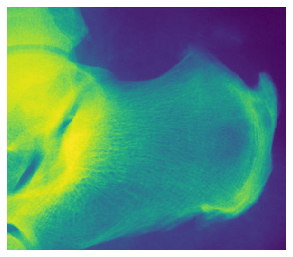

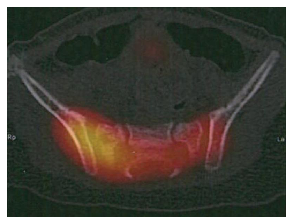

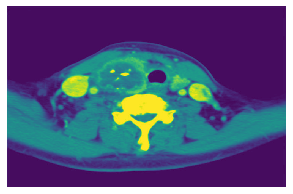

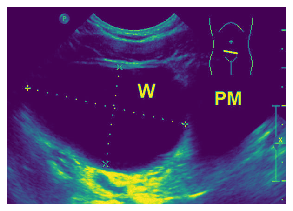

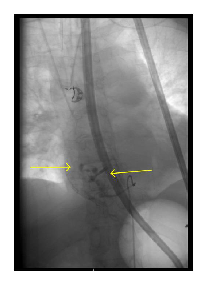

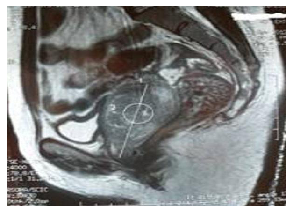

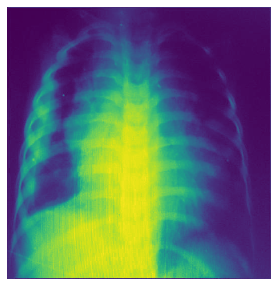

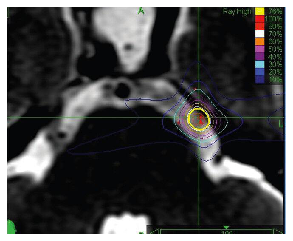

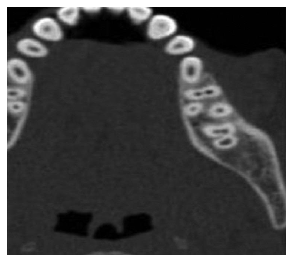

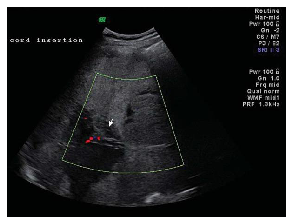

In [8]:
for num in range(0,len(loadedImages)):
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(loadedImages[num])

We print the tag IDs and names of these images

In [12]:
imagesList = os.listdir('training-set')
tags=[]
for img in imagesList[0:10]:
    img=img.replace('.jpg','')
    print(img)
    
    tags = train_c['tags'].loc[train_c.image == (img)]
    print(tags)
    
    for string in range(0, len(str_c[:,0])):
        for tag in tags:
            for t in tag:
                if t == str_c[string,0]:
                    print(str_c[string,1])
    print()

ROCO_CLEF_34049
31723    [C1548003, C1962945, C0772294, C0043299, C0006...
Name: tags, dtype: object
x-ray procedure
visible lesion
calcaneal
radiograph
radiogr
alesion

ROCO_CLEF_09749
8493    [C0342952, C0040399]
Name: tags, dtype: object
increased basal metabolic rate
single photon emission tomography

ROCO_CLEF_00783
38413    [C1551379, C0374082, C0796494, C0333581, C0040...
Name: tags, dtype: object
h x
decalcification
lobus
head and neck
x-ray computer assisted tomography
enhancementdescription
internalid
tomogr
recalcification
calcifications
demineralisation
pantomogr
materials
collum
thyreoidin
hypocalcification
contrasting
euthyroid

ROCO_CLEF_39108
23489    [C0000726, C1552853, C0005682]
Name: tags, dtype: object
contents
abdominopelvis
urinary system

ROCO_CLEF_41079
26513    [C0002978, C0175722, C0700124, C0162868, C1322...
Name: tags, dtype: object
abnormal dilation
widening action
dilatazione
clip device
false aneurysm
x-ray of the blood vessel

ROCO_CLEF_11475
23606    [

This is the number of the different tags

In [0]:
len(str_c)

5528

This is the number of tags for every training image

In [13]:
train_c['tags'].apply(len)

0        2
1        5
2        4
3        2
4        2
        ..
56624    4
56625    2
56626    7
56627    3
56628    8
Name: tags, Length: 56629, dtype: int64

We will find the most frequent tags

In [0]:
tags = pd.DataFrame(str_c)
tags.columns=[['id','name']]
print(tags.iloc[:,0])
tags

0       C0032143
1       C0225516
2       C0825429
3       C0020461
4       C0947912
          ...   
5523    C0044955
5524    C3812869
5525    C2751430
5526    C0441621
5527    C0237886
Name: (id,), Length: 5528, dtype: object


,id,name
0,C0032143,r-tpa
1,C0225516,lower hypopharyngeal region
2,C0825429,bone surface
3,C0020461,excessive potassium in the blood
4,C0947912,proximal muscle weakness due to defect at the ...
...,...,...
5523,C0044955,prednylidene (pred)
5524,C3812869,medicated
5525,C2751430,camptodactyly and knuckle pads
5526,C0441621,sampled


In [0]:
frequency = pd.DataFrame()
frequency['tag'] = tags.iloc[:, 0]
frequency['freq'] = 0

In [0]:
for tag in frequency.tag:
    count = 0
    for tags in train_c.tags:
        if tag in tags:
            count+=1
    frequency.freq.loc[frequency.tag == tag] =count

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
frequency = frequency.drop(frequency[frequency.freq == 0].index)

In [0]:
frequency.sort_values('freq', ascending = False)

,tag,freq
1928,C0441633,6733
72,C0043299,6321
4340,C1962945,6318
2754,C0040395,6235
3647,C0034579,6127
...,...,...
1502,C0071964,1
3909,C1547301,1
1510,C0429094,1
1511,C0870803,1


The most frequent tag is 'C0441633'

# Data Preprocessing

We generate our data images and the classes (tags) where they belong.

In [0]:
for i in range(len(train_c)):
  train_c.iloc[i].image = train_c.iloc[i].image + '.jpg'

for i in range(len(val_c)):
  val_c.iloc[i].image = val_c.iloc[i].image + '.jpg'

In [0]:
tags = pd.DataFrame(str_c)
tags.columns=[['id','name']]

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_dataframe(directory='training-set', dataframe = train_c,
                                                           x_col='image', y_col='tags',
                                                           target_size=(32, 32), classes=tags.iloc[:,0].to_list(), 
                                                           class_mode='categorical', batch_size=128, shuffle=True)

val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator.flow_from_dataframe(directory='validation-set', dataframe = val_c,
                                                           x_col='image', y_col='tags',
                                                           target_size=(32, 32), classes=tags.iloc[:,0].to_list(), 
                                                           class_mode='categorical', batch_size=128, shuffle=True)


Found 56629 validated image filenames belonging to 5528 classes.
Found 14157 validated image filenames belonging to 5528 classes.


# Baseline Classifier

We create a baseline classifier

In [9]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32 ,3)),
    MaxPooling2D(),
    Flatten(),
    Dense(5528, activation='relu')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=len(train_c) // 128,
    epochs=5,
    validation_data=val_data_gen,
    validation_steps=len(val_c) // 128
)

Epoch 1/5
442/442 [==============================] - 246s 556ms/step - loss: 62.9308 - acc: 0.0135 - val_loss: 63.4306 - val_acc: 0.0091
Epoch 2/5
442/442 [==============================] - 243s 550ms/step - loss: 62.3645 - acc: 0.0129 - val_loss: 63.0722 - val_acc: 0.0097
Epoch 3/5
442/442 [==============================] - 242s 546ms/step - loss: 62.1429 - acc: 0.0123 - val_loss: 62.9137 - val_acc: 0.0120
Epoch 4/5
442/442 [==============================] - 241s 544ms/step - loss: 61.9652 - acc: 0.0128 - val_loss: 62.9054 - val_acc: 0.0138
Epoch 5/5
442/442 [==============================] - 240s 543ms/step - loss: 61.8857 - acc: 0.0126 - val_loss: 62.8173 - val_acc: 0.0114


The maximum accuracy is 0.0126



# Neural Network

In [14]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(5528, activation='relu')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=len(train_c) // 128,
    epochs=5,
    validation_data=val_data_gen,
    validation_steps=len(val_c) // 128
)

Epoch 1/5
442/442 [==============================] - 238s 538ms/step - loss: 71.8884 - acc: 0.0354 - val_loss: 72.6695 - val_acc: 0.0371
Epoch 2/5
442/442 [==============================] - 239s 540ms/step - loss: 71.7836 - acc: 0.0404 - val_loss: 72.2858 - val_acc: 0.0439
Epoch 3/5
442/442 [==============================] - 238s 539ms/step - loss: 71.7764 - acc: 0.0352 - val_loss: 72.4285 - val_acc: 0.0386
Epoch 4/5
442/442 [==============================] - 237s 536ms/step - loss: 71.4566 - acc: 0.0401 - val_loss: 71.7927 - val_acc: 0.0411
Epoch 5/5
442/442 [==============================] - 236s 534ms/step - loss: 70.9760 - acc: 0.0422 - val_loss: 71.7883 - val_acc: 0.0456


In [0]:
model.save('imageclef.h5')

In [16]:
model = tf.keras.models.load_model('imageclef.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# F1 Score

In [175]:
new_val_image_generator = ImageDataGenerator(rescale=1./255)
new_val_data_gen = new_val_image_generator.flow_from_dataframe(directory='validation-set', dataframe = val_c,
                                                           x_col='image', y_col='tags',
                                                           target_size=(32, 32), classes=tags.iloc[:,0].to_list(), 
                                                           class_mode='categorical', batch_size=14157, shuffle=True)

Found 14157 validated image filenames belonging to 5528 classes.


In [0]:
predictions = model.predict_generator(generator=new_val_data_gen)
#y_pred = [np.argmax(probas) for probas in predictions]
#y_test = val_data_gen.classes

In [0]:
y_pred = predictions > 1.0

In [0]:
x, y = new_val_data_gen.next()

In [0]:
f1score = f1_score(y, y_pred, average='samples')

This the average f1 score of all the predictions on validation images

In [183]:
f1score

0.0558735036510765

In [184]:
new1_val_image_generator = ImageDataGenerator(rescale=1./255)
new1_val_data_gen = new1_val_image_generator.flow_from_dataframe(directory='validation-set', dataframe = val_c,
                                                           x_col='image', y_col='tags',
                                                           target_size=(32, 32), classes=tags.iloc[:,0].to_list(), 
                                                           class_mode='categorical', batch_size=1, shuffle=True)

Found 14157 validated image filenames belonging to 5528 classes.


In [0]:
f1scores = []
for i in range(14157):
  f1score = f1_score(y[i], y_pred[i], average = 'binary')
  f1scores.append(f1score)

These are the f1 scores for every validation image

In [186]:
f1scores

[0.0,
 0.13333333333333333,
 0.0,
 0.0,
 0.07017543859649122,
 0.13114754098360656,
 0.08333333333333333,
 0.1176470588235294,
 0.05333333333333333,
 0.0,
 0.05405405405405405,
 0.12,
 0.0,
 0.0,
 0.039999999999999994,
 0.0,
 0.0,
 0.1111111111111111,
 0.0,
 0.0,
 0.041666666666666664,
 0.1111111111111111,
 0.05333333333333333,
 0.05555555555555555,
 0.030303030303030297,
 0.03636363636363636,
 0.12903225806451613,
 0.0,
 0.0,
 0.06896551724137931,
 0.04761904761904762,
 0.1212121212121212,
 0.0,
 0.12,
 0.0,
 0.04545454545454545,
 0.034482758620689655,
 0.10714285714285714,
 0.0,
 0.0,
 0.0,
 0.06451612903225806,
 0.0,
 0.052631578947368425,
 0.0975609756097561,
 0.05405405405405406,
 0.1408450704225352,
 0.06896551724137931,
 0.0,
 0.08,
 0.05333333333333333,
 0.08333333333333333,
 0.0,
 0.0,
 0.1212121212121212,
 0.0,
 0.0,
 0.11320754716981131,
 0.03225806451612903,
 0.05555555555555555,
 0.05263157894736842,
 0.0,
 0.031746031746031744,
 0.09999999999999999,
 0.08333333333333333,


In [187]:
np.average(f1scores)

0.0558735036510765

(this is evidence that something went wrong)

In [188]:
np.max(f1scores)

0.5161290322580644

# Trying Test Images Prediction

In [192]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    directory='test-set',
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=10000,
    class_mode=None,
    shuffle=False
)

Found 10000 images belonging to 1 classes.


In [0]:
predictions =model.predict_generator(test_generator)

In [0]:
predicted_class_indices=np.argmax(predictions,axis=1)
labels = (train_data_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [198]:
len(predictions)

10000